# Global Power Plant Database

# Problem Statement:

Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

# Prediction:

Make two prediction for 
1) primary_fuel
2) capacity_mw

# Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r'E:\sheeba working\global_power.csv')
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


The given dataset contains numerical and categorical columns.Here we have to predict both 1) primary_fuel 2) capacity_mw from the datset.


# Exploratory Data Analysis

In [15]:
data.shape

(907, 11)

The dataset contains 907 rows and 27 columns..there are more independent features except the target column

In [16]:
data.dtypes

name                    object
capacity_mw            float64
primary_fuel            object
other_fuel1             object
source                  object
geolocation_source      object
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

The dataset contains 2 types of data namely float type and object type. We will convert this object type data into numerical using encoding techniquies before building the model.

In [17]:
data.isna().sum()

name                     0
capacity_mw              0
primary_fuel             0
other_fuel1            709
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 907 non-null    object 
 1   capacity_mw          907 non-null    float64
 2   primary_fuel         907 non-null    object 
 3   other_fuel1          198 non-null    object 
 4   source               907 non-null    object 
 5   geolocation_source   888 non-null    object 
 6   generation_gwh_2014  398 non-null    float64
 7   generation_gwh_2015  422 non-null    float64
 8   generation_gwh_2016  434 non-null    float64
 9   generation_gwh_2017  440 non-null    float64
 10  generation_gwh_2018  448 non-null    float64
dtypes: float64(6), object(5)
memory usage: 78.1+ KB


In [19]:
data.isna().sum()

name                     0
capacity_mw              0
primary_fuel             0
other_fuel1            709
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [11]:
print('Shape',data.shape)
print('____________________________________________________________________________________________________')
data.describe()

Shape (907, 11)
____________________________________________________________________________________________________


,capacity_mw,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,1516.689956,1510.071296,1565.361383,1657.121797,1665.011030
std,590.085456,2785.604307,2984.994556,3005.087210,3046.862910,3168.826750
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,801.123775,711.181225,737.205450,817.977250,751.644375
50%,59.200000,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,801.123775,711.181225,737.205450,817.977250,751.644375
max,4760.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


In [12]:
data

,name,capacity_mw,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,ACME Solar Tower,2.5,Solar,Oil,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375
1,ADITYA CEMENT WORKS,98.0,Coal,Oil,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
2,AES Saurashtra Windfarms,39.2,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
3,AGARTALA GT,135.0,Gas,Oil,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,AKALTARA TPP,1800.0,Coal,Oil,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...
902,YERMARUS TPP,1600.0,Coal,Oil,Central Electricity Authority,WRI,801.123775,0.994875,233.596650,865.400000,686.500000
903,Yelesandra Solar Power Plant,3.0,Solar,Oil,Karnataka Power Corporation Limited,Industry About,801.123775,711.181225,737.205450,817.977250,751.644375
904,Yelisirur wind power project,25.5,Wind,Oil,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
905,ZAWAR MINES,80.0,Coal,Oil,Hindustan Zinc ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375


In [13]:
numerics = ['int8','int16','int32','int64','float16','float32','float64']
categorical_columns = []
features=data.columns.values.tolist()

for col in features:
    if data[col].dtypes in numerics:
        continue
    data[col] = LabelEncoder().fit_transform(data[col])

Observation:converting the datas in categorical feature to numerical using label encoding method for building the model

In [14]:
data

,name,capacity_mw,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,2.5,6,2,109,1,801.123775,711.181225,737.205450,817.977250,751.644375
1,1,98.0,1,2,174,2,801.123775,711.181225,737.205450,817.977250,751.644375
2,2,39.2,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375
3,3,135.0,2,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,4,1800.0,1,2,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...
902,902,1600.0,1,2,22,2,801.123775,0.994875,233.596650,865.400000,686.500000
903,903,3.0,6,2,77,0,801.123775,711.181225,737.205450,817.977250,751.644375
904,904,25.5,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375
905,905,80.0,1,2,59,2,801.123775,711.181225,737.205450,817.977250,751.644375


In [15]:
#Checking and removing if there is any Duplicate entry present in our dataset
data.drop_duplicates(inplace=True)
data.shape

(907, 11)

In [16]:
# Checking for Multicollinearity using VIF

w = data[list(data.columns)]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(w.values, i) for i in range(w.shape[1])]
vif_info['Column'] = w.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
9,67.701482,generation_gwh_2017
10,55.959972,generation_gwh_2018
8,55.957886,generation_gwh_2016
7,43.130115,generation_gwh_2015
3,33.013445,other_fuel1
6,18.419280,generation_gwh_2014
5,13.841509,geolocation_source
1,7.249536,capacity_mw
2,4.900653,primary_fuel
0,4.037708,name


# Visualizations

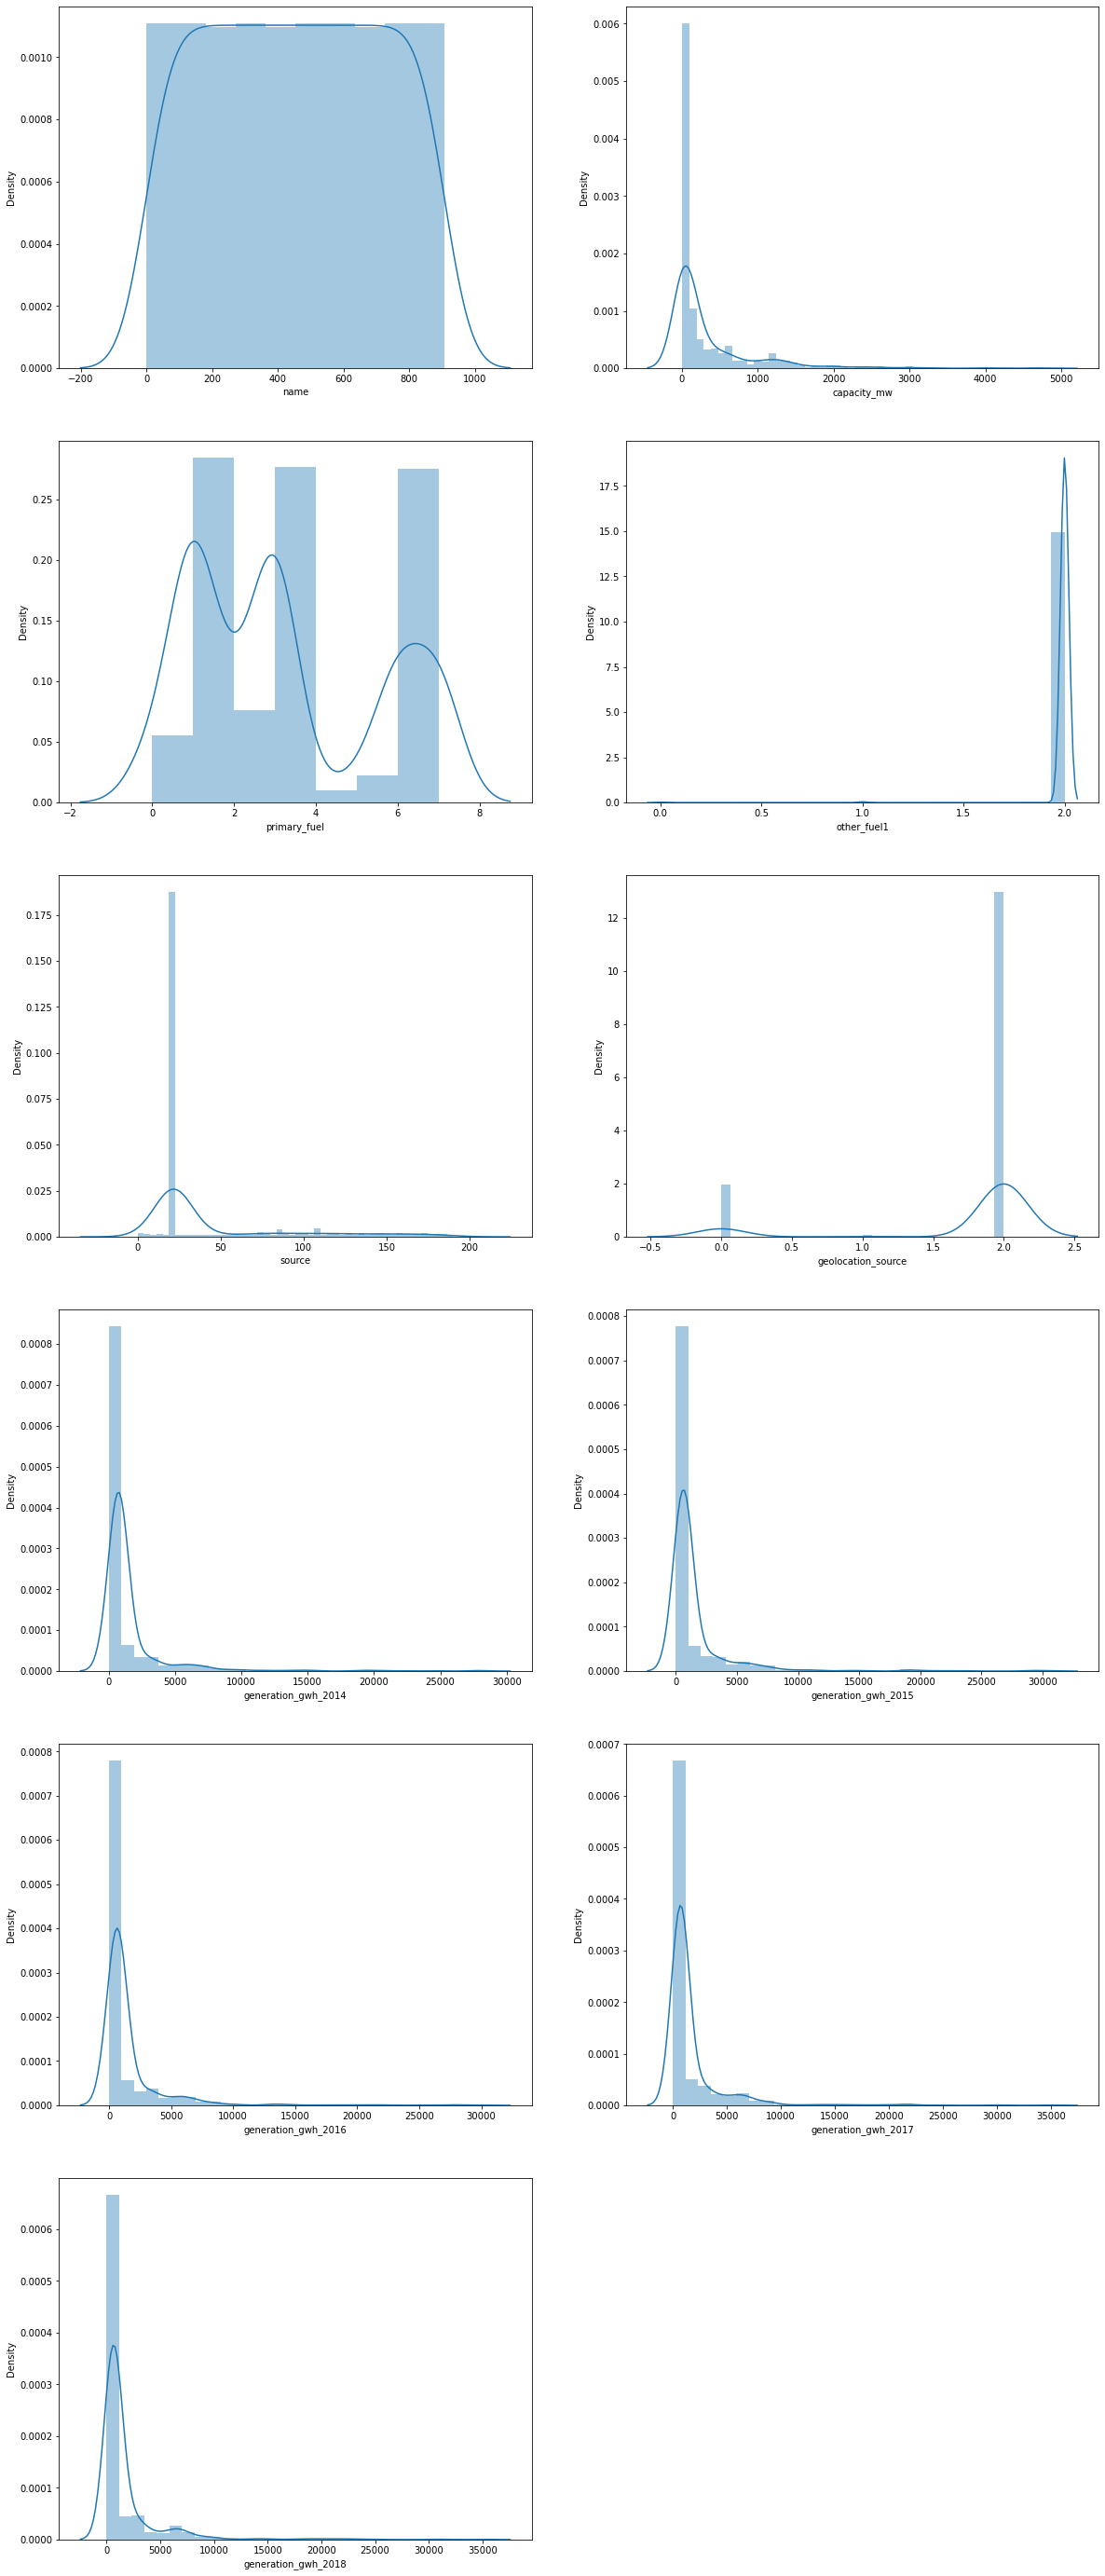

In [17]:
plt.figure(figsize=(20,50),facecolor="white")
plotnumber=1
for column in data:
    if plotnumber<=12:
        ax=plt.subplot(6,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

Observations:
    
    1)from the graph1 indicates the relation between name of the plant type to density  of the plant it is similar to one
    
    2)In graph2 indicates density vs capacitymw it increases to peak and reduces at first phase of 1000mw
    
    3)In graph3 denotes the primaryfuel vs density..it should randomly increses and decreses similarly
    
    4)In graph 4 denotes the other fuel density is increases to high counts
    
    5)In graph5 denotes source of the plant versus density..in increases to peal count of 0.175 at 25-30 value in source.
    
    6)similarly generation_gwh_2014,2015,2016,2017,2018_2018 more or less all the generation_gwh are increasing to peak and reducing between(0-10000)gwh
    
    7)In the graph gelocation souce slightly increases at 0 for 2 and and increases to peak at 2 to density level 12
    

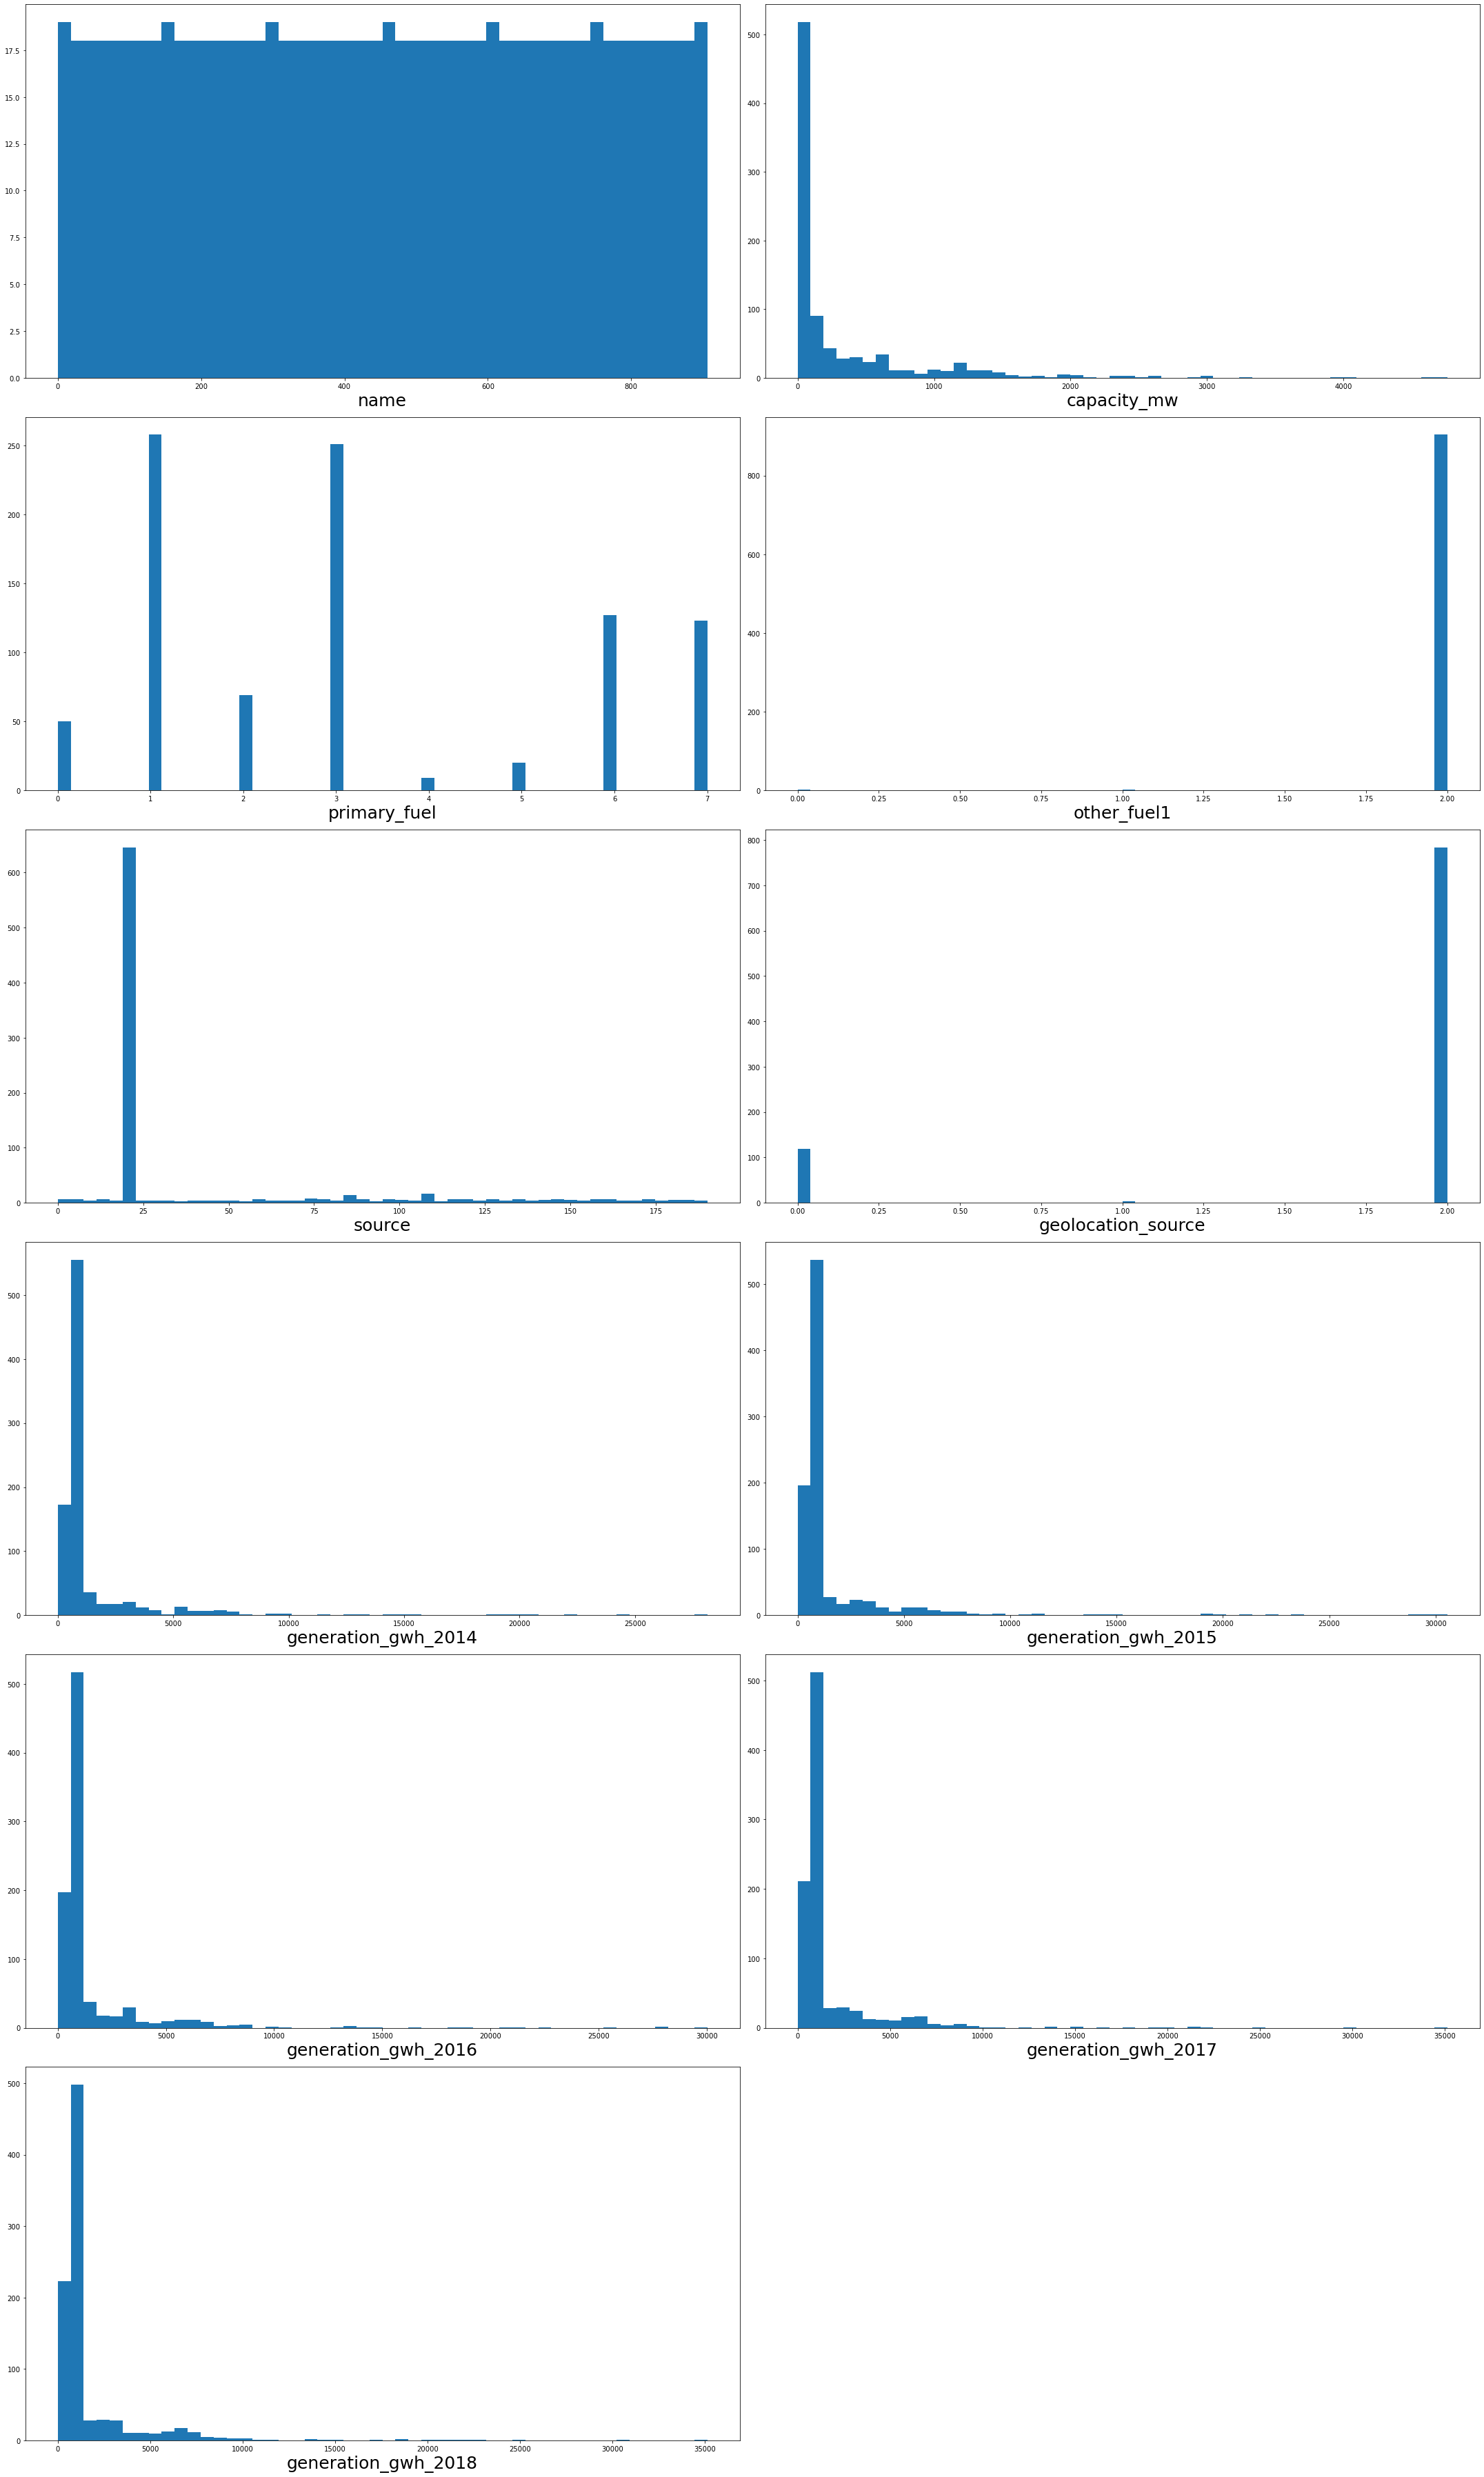

In [18]:
plt.figure(figsize=[30,50])
plotnumber=1

for column in data:
    if plotnumber<=12:
        ax=plt.subplot(6,2,plotnumber)
        plt.hist(data[column], bins=50)
        plt.xlabel(column, fontsize=25)
    plotnumber+=1
plt.tight_layout()

In [19]:
data

,name,capacity_mw,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,0,2.5,6,2,109,1,801.123775,711.181225,737.205450,817.977250,751.644375
1,1,98.0,1,2,174,2,801.123775,711.181225,737.205450,817.977250,751.644375
2,2,39.2,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375
3,3,135.0,2,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,4,1800.0,1,2,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...
902,902,1600.0,1,2,22,2,801.123775,0.994875,233.596650,865.400000,686.500000
903,903,3.0,6,2,77,0,801.123775,711.181225,737.205450,817.977250,751.644375
904,904,25.5,7,2,21,2,801.123775,711.181225,737.205450,817.977250,751.644375
905,905,80.0,1,2,59,2,801.123775,711.181225,737.205450,817.977250,751.644375


# Correlation between the target variable and independent variables using HEAT map

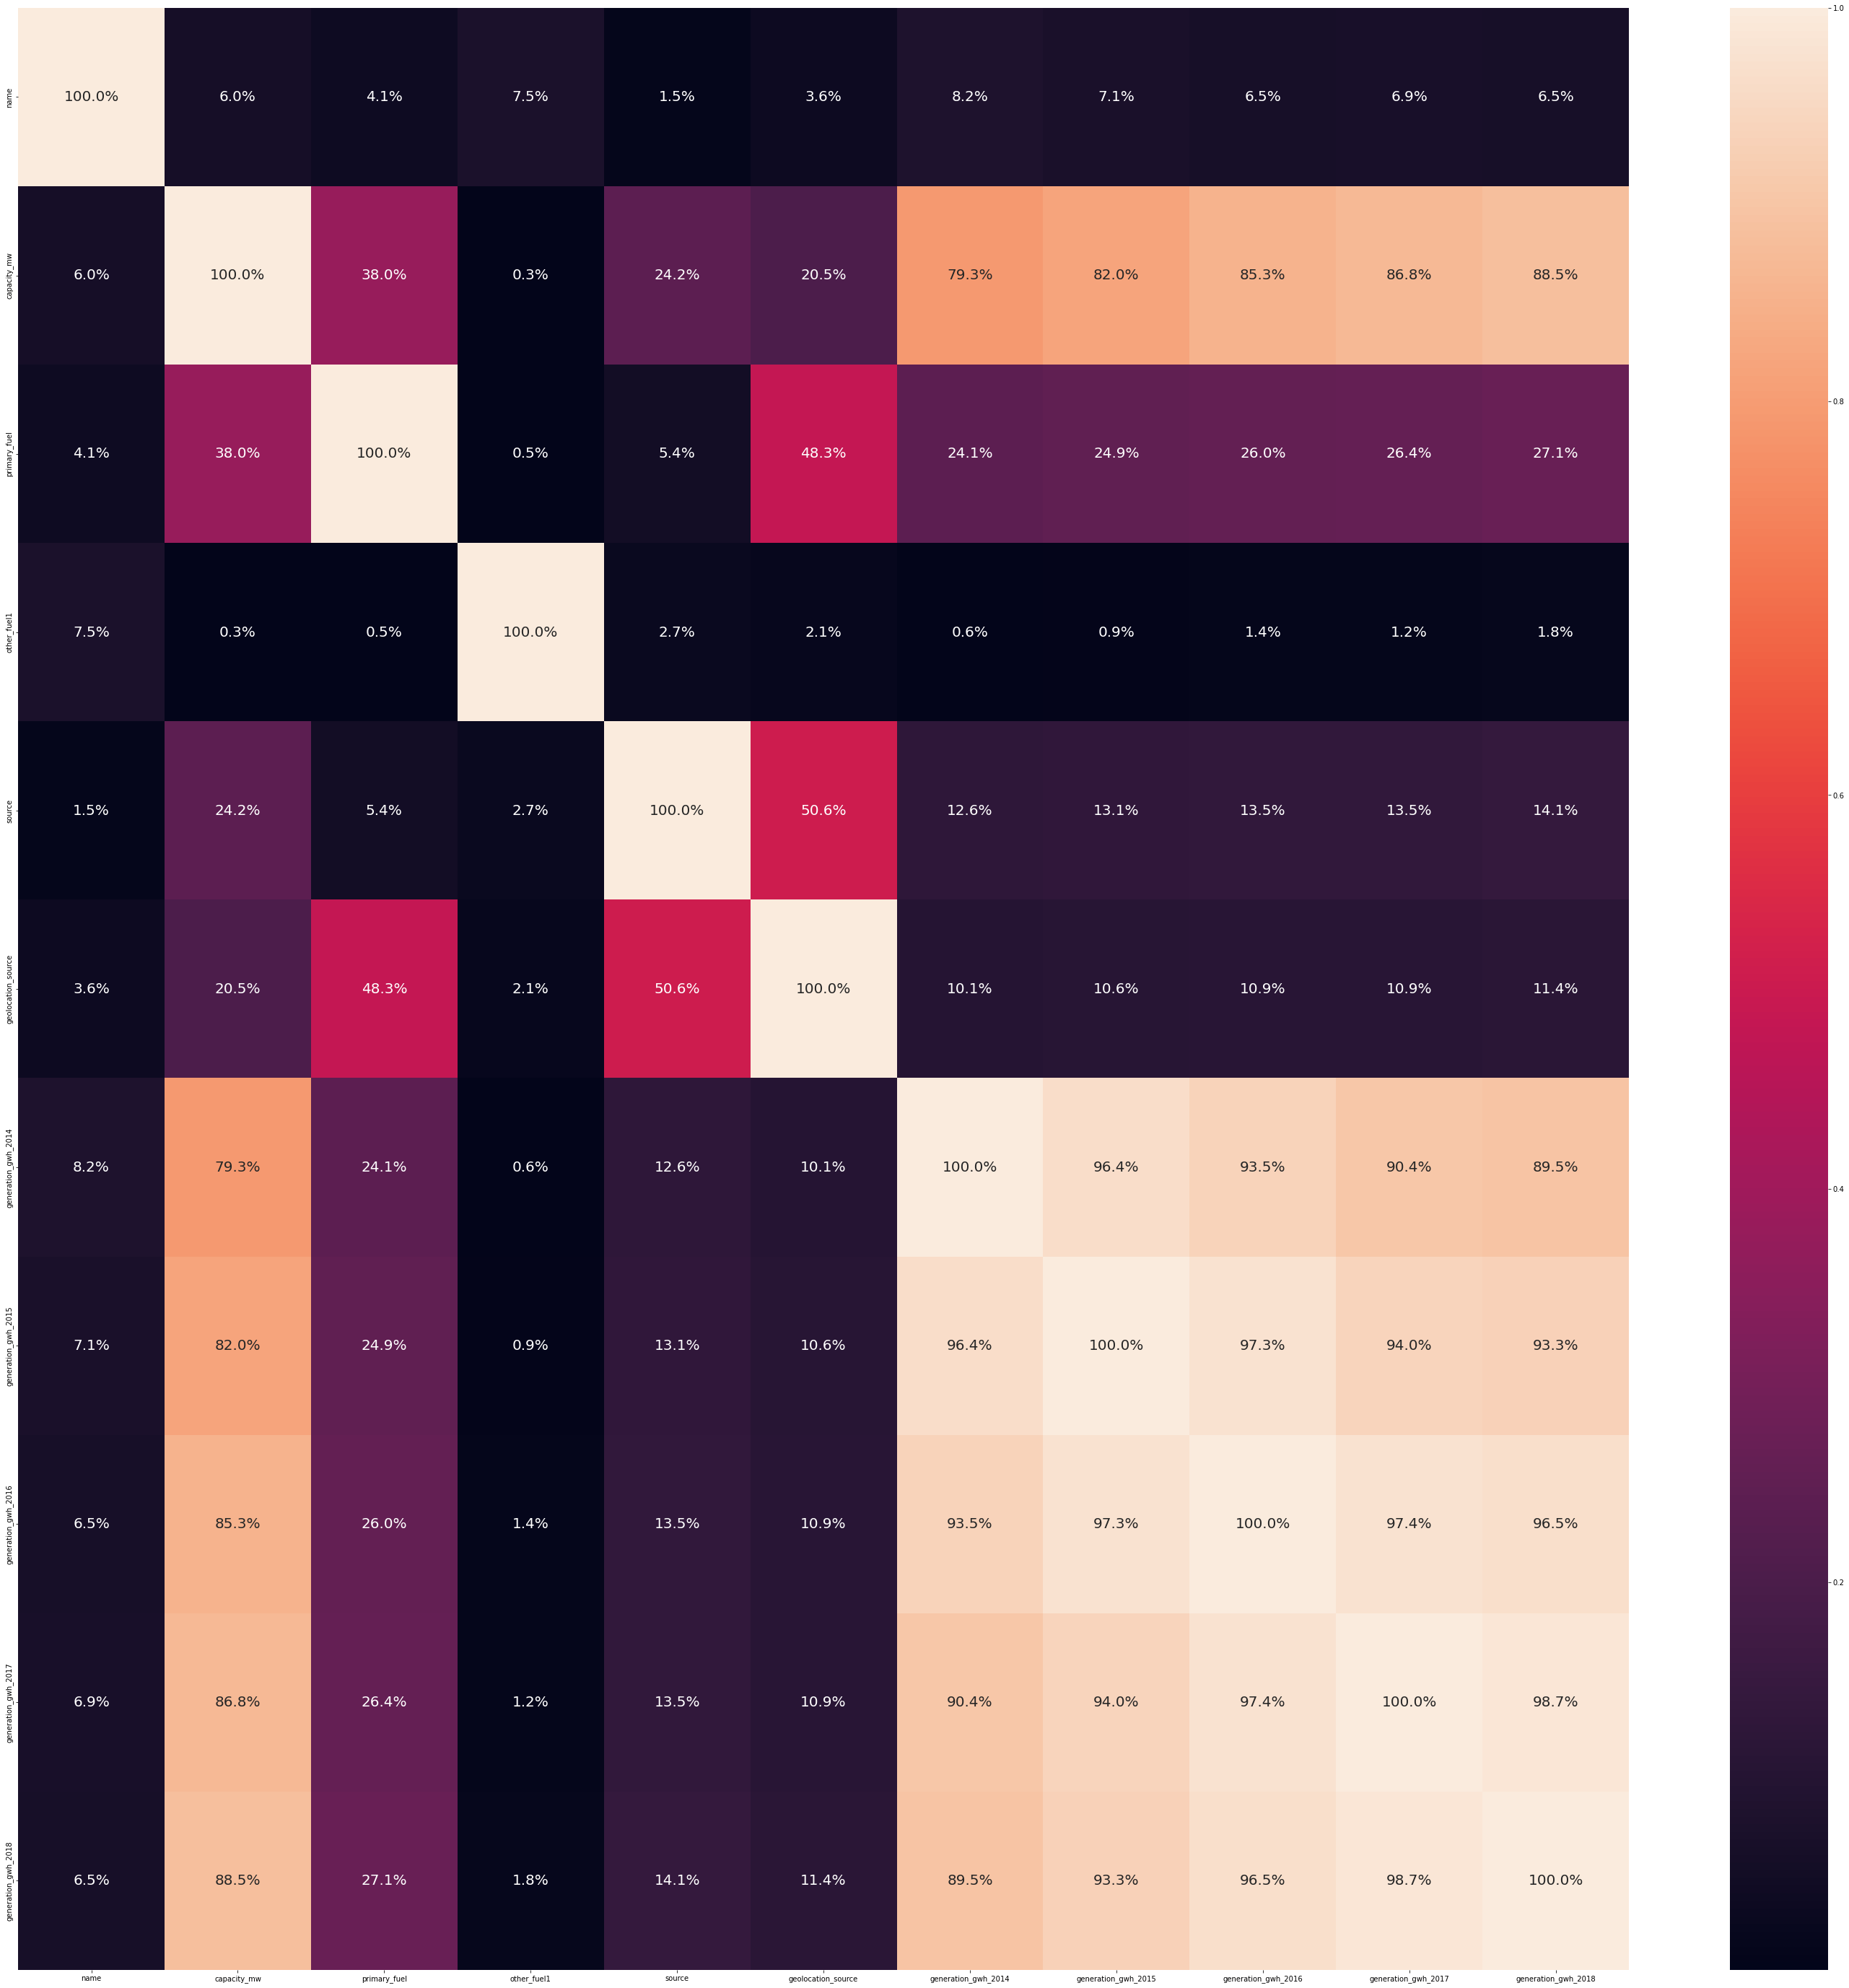

In [20]:
df_corr=data.corr().abs()
plt.figure(figsize=(50,50))
sns.heatmap(df_corr,annot=True, annot_kws={'size':20}, fmt='.1%')
plt.show()

observation: 
    
    This heatmap shows the correlation matrix by visualizing the data. We can observe the relation between one feature to other.This heat map contains both positive and negative correlaionThere is no much correlation between the target and the label.There is no multicolinearity issue exists in the dat aso no need to worry much.

# Outliers Handling

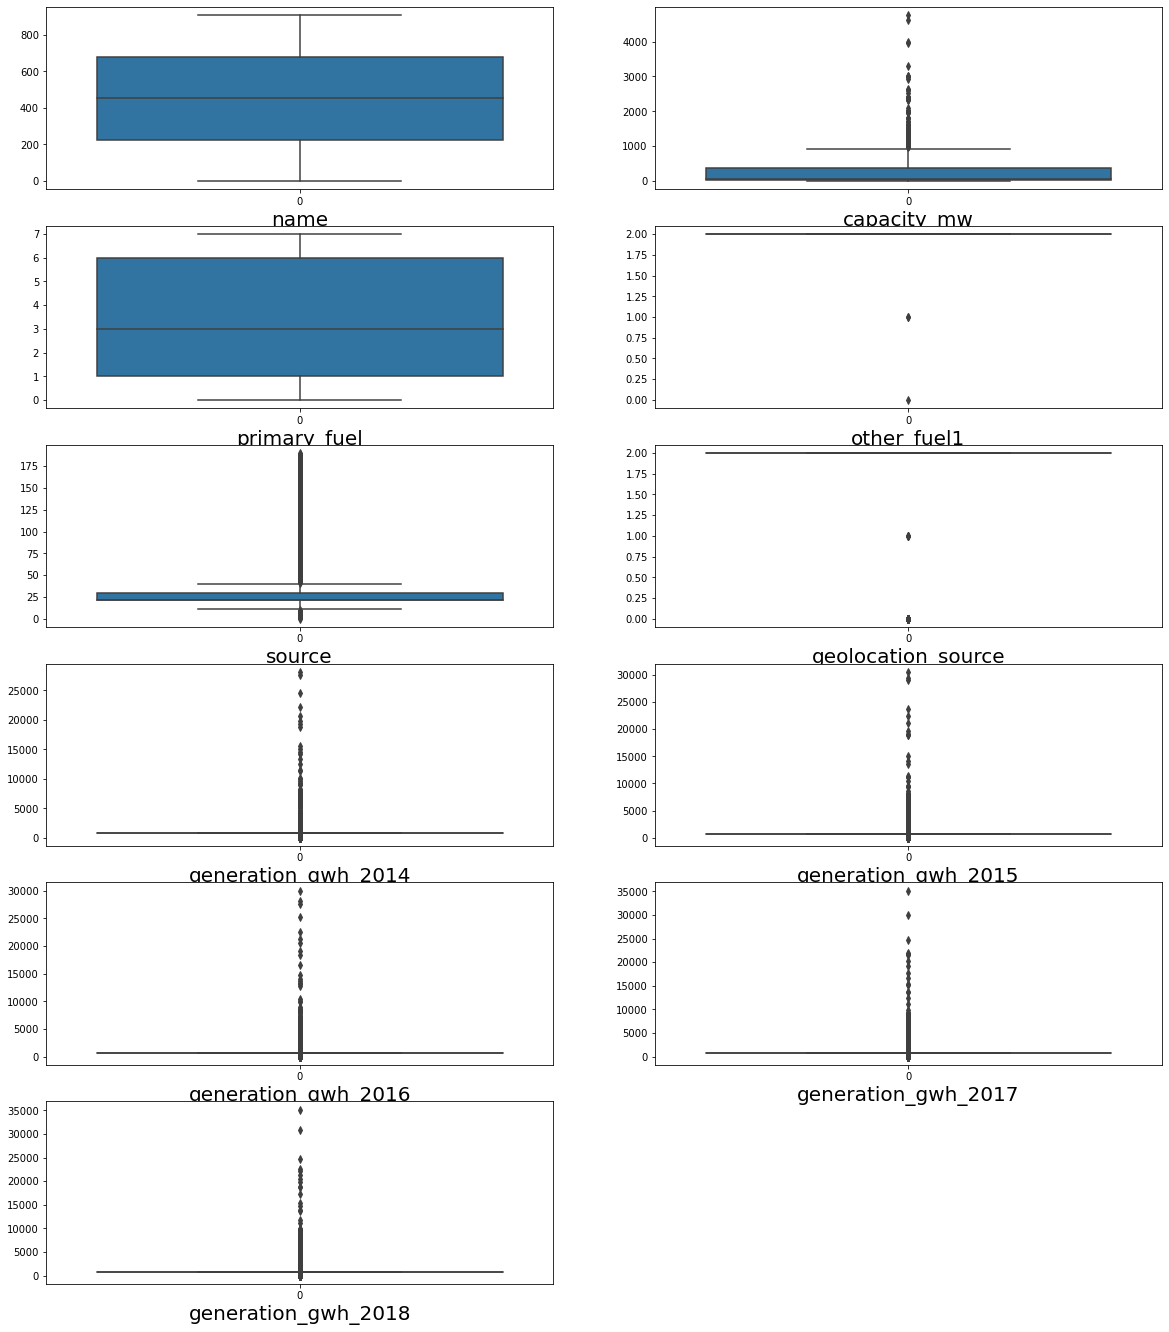

In [21]:
#Let's check for outliers
plt.figure(figsize=(20,100))
graph=1
for column in data:
    if plotnumber<=50:
        ax=plt.subplot(25,2,graph)
        sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=20)
    graph+=1
plt.show()

The outliers present in all the columns we will remove it using ZSCORE method or IQR method.

# Removing Outliers

# ZSCORE METHOD

In [22]:
from scipy.stats import zscore
z= np.abs(zscore(data))

In [23]:
threshold= 3 
print(np.where(z>3))

(array([ 15,  15,  15,  15,  15,  71,  80, 143, 143, 143, 143, 143, 143,
       147, 158, 191, 209, 209, 209, 209, 209, 209, 299, 308, 308, 308,
       308, 308, 308, 321, 345, 363, 364, 364, 364, 364, 364, 364, 375,
       482, 482, 493, 493, 493, 493, 493, 493, 494, 494, 494, 494, 494,
       494, 532, 623, 648, 648, 648, 648, 648, 648, 657, 657, 657, 657,
       657, 657, 661, 669, 689, 695, 695, 695, 695, 695, 695, 721, 721,
       721, 721, 721, 724, 724, 724, 724, 724, 726, 726, 726, 726, 726,
       726, 767, 786, 786, 786, 786, 786, 786, 788, 808, 808, 808, 808,
       808, 808, 811, 813, 817, 832, 870, 871, 879, 880, 880, 880, 880,
       880, 880, 895, 900], dtype=int64), array([ 1,  7,  8,  9, 10,  4,  4,  1,  6,  7,  8,  9, 10,  1,  6,  4,  1,
        6,  7,  8,  9, 10,  4,  1,  6,  7,  8,  9, 10,  4,  4,  1,  1,  6,
        7,  8,  9, 10,  1,  1, 10,  1,  6,  7,  8,  9, 10,  1,  6,  7,  8,
        9, 10,  6,  6,  1,  6,  7,  8,  9, 10,  1,  6,  7,  8,  9, 10,  4,
        4

In [24]:
df=data[(z<3).all(axis=1)]
print(data.shape)
print(df.shape)

(907, 11)
(864, 11)


In [25]:
data['primary_fuel'].value_counts()

1    258
3    251
6    127
7    123
2     69
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

# prediction of primary_fuel

In [30]:
# Let us know split our data into Features & labels

x=data.drop('primary_fuel', axis=1)
y=data['primary_fuel']

In [31]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [32]:
# Now let's split our data into Train_test_split

x_train, x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25, random_state=44)

In [33]:
y_train.value_counts()

3    194
1    194
7     93
6     87
2     54
0     32
5     18
4      8
Name: primary_fuel, dtype: int64

# Importing necessary libraries

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [35]:
lr=LogisticRegression()
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()

In [36]:
#Training of Models starts here

lr.fit(x_train,y_train)
knn.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)

print('Training completed')

Training completed


In [37]:
#Let's check the scores now

print(lr.score(x_test,y_test))
print(knn.score(x_test,y_test))
print(dt.score(x_test,y_test))
print(rf.score(x_test,y_test))

0.6211453744493393
0.6872246696035242
0.7444933920704846
0.7797356828193832


In [38]:
lr_pred = lr.predict(x_test)
knn_pred = knn.predict(x_test)
dt_pred = dt.predict(x_test)
rf_pred = rf.predict(x_test)

In [39]:
print('Logistic Regression:',accuracy_score(y_test,lr_pred))
print('KNN :',accuracy_score(y_test,knn_pred))
print('Decision Tree :', accuracy_score(y_test,dt_pred))
print('Random Forest :',accuracy_score(y_test,rf_pred))

Logistic Regression: 0.6211453744493393
KNN : 0.6872246696035242
Decision Tree : 0.7444933920704846
Random Forest : 0.7797356828193832


In [40]:
#Let's do some Hyperparameter tuning using GridSearchCV algorithm
grid_param={
    'criterion':['gini','entropy'],
    'max_depth':range(10,20),
    'min_samples_leaf':range(2,15),
    'min_samples_split': range(2,10),
    'max_leaf_nodes':range(2,5)
}

In [41]:
grid_search=GridSearchCV(estimator=dt,param_grid=grid_param,cv=5,n_jobs=-1)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 20),
                         'max_leaf_nodes': range(2, 5),
                         'min_samples_leaf': range(2, 15),
                         'min_samples_split': range(2, 10)})

In [42]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [43]:
dec_tree=DecisionTreeClassifier(criterion='gini',max_leaf_nodes=10,min_samples_split=3,max_depth=20,min_samples_leaf=4)
r_f=RandomForestClassifier(criterion='gini',max_leaf_nodes=3,min_samples_split=2,max_depth=10,min_samples_leaf=2)

In [44]:
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=20, max_leaf_nodes=10, min_samples_leaf=4,
                       min_samples_split=3)

In [45]:
r_f.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, max_leaf_nodes=3, min_samples_leaf=2)

In [46]:
y1_pred=dec_tree.predict(x_test)
y2_pred=r_f.predict(x_test)

In [47]:
accuracy_score(y_test,y1_pred)

0.7180616740088106

In [48]:
accuracy_score(y_test,y2_pred)

0.6651982378854625

In [49]:
#Let's save our model for future use
filename='GPPD_fuel.pickle'
pickle.dump(dec_tree,open(filename,'wb'))

# Prediction on capacity_mw

In [50]:
# Now, firstly Let us know split our data into Features & label

p=data.drop('capacity_mw', axis=1)
q=data['capacity_mw']

In [51]:
scaler=StandardScaler()
p_scaled=scaler.fit_transform(p)

In [52]:
# Now let's split our data into Train_test_split

p_train, p_test,q_train,q_test=train_test_split(p_scaled,q,test_size=0.25, random_state=44)

In [53]:
# Now let's split our data into Train_test_split

p_train, p_test,q_train,q_test=train_test_split(p_scaled,q,test_size=0.25, random_state=44)
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve

In [54]:
lr=LinearRegression()
knn=KNeighborsRegressor()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
gbdt=GradientBoostingRegressor()

In [55]:
#Training of Models starts here

lr.fit(p_train,q_train)

print('Training completed')

Training completed


In [56]:
knn.fit(p_train,q_train)

KNeighborsRegressor()

In [57]:
dt.fit(p_train,q_train)

DecisionTreeRegressor()

In [58]:
rf.fit(p_train,q_train)

RandomForestRegressor()

In [59]:
gbdt.fit(p_train,q_train)

GradientBoostingRegressor()

In [60]:
#Let's check the scores now

print(lr.score(p_train,q_train))
print(knn.score(p_train,q_train))
print(dt.score(p_train,q_train))
print(rf.score(p_train,q_train))
print(gbdt.score(p_train,q_train))

0.8109416857784324
0.8666184000381727
1.0
0.9795861949454764
0.9613224182633996


In [61]:
#Let's check the scores now

print(lr.score(p_test,q_test))
print(knn.score(p_test,q_test))
print(dt.score(p_test,q_test))
print(rf.score(p_test,q_test))
print(gbdt.score(p_test,q_test))

0.8394985180588544
0.876194163434094
0.8274732715847604
0.8965890570360813
0.8791697100242031


observation:we can conclude that KNeighbors Classifier as our best fitting model which is giving very less difference compare to other models

# Saving The Model